# Logistic Transformation and Prediction for Concentric Data

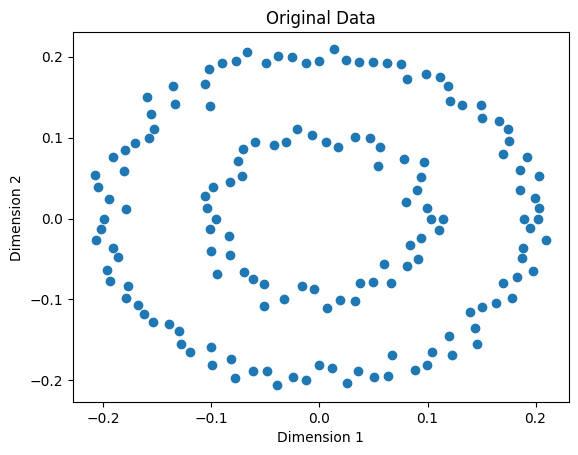

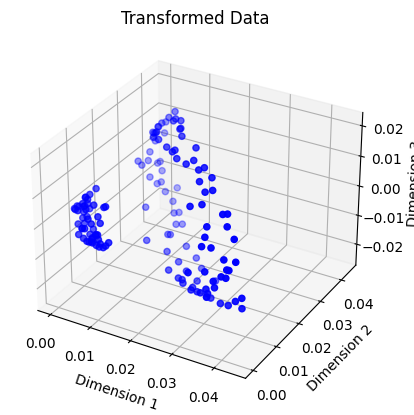

break


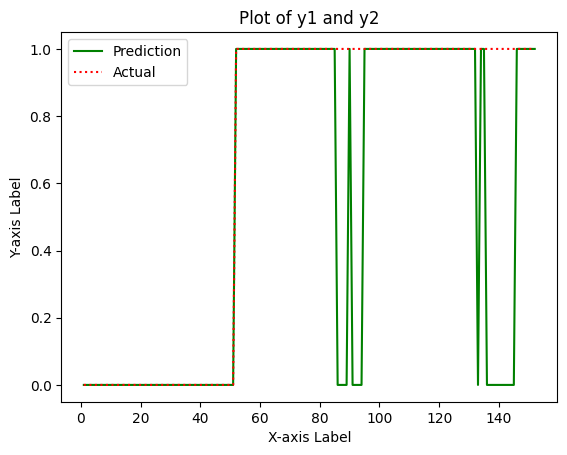

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io


def logistic_function(x):
    return 1 / (1 + np.exp(-x))


def logistic_function_derivative(x):
    return logistic_function(x) * (1 - logistic_function(x))


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def sigmoid_prime(x):
    y = sigmoid(x)
    return y * (1 - y)


def W_init(rows, col):
    input_dim = rows
    output_dim = col

    std_dev = np.sqrt(2 / (input_dim + output_dim))
    W = np.random.randn(input_dim, output_dim) * std_dev

    return W


if __name__ == '__main__':
    file = scipy.io.loadmat('/content/concentric.mat')
    X = file["X"]
    labels = np.zeros((1, 152))
    labels[0, 51:] = 1

    x = X[0, :]
    y = X[1, :]

    plt.scatter(x, y)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Original Data')
    plt.show()

    Z = np.zeros((3, 152))
    Z[0, :] = np.power(X[0, :], 2)
    Z[1, :] = np.power(X[1, :], 2)
    Z[2, :] = X[0, :] * X[1, :]

    x = Z[0, :]
    y = Z[1, :]
    z = Z[2, :]

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z, c='b', marker='o', label='Data Points')
    ax.set_xlabel('Dimension 1')
    ax.set_ylabel('Dimension 2')
    ax.set_zlabel('Dimension 3')
    ax.set_title('Transformed Data')
    plt.show()

    l_rate = 0.1
    tol = 1e-5
    epochs = 5000

    # weights = np.random.randn(3, 1)
    # weights = weights - weights.mean()
    weights = W_init(3, 1)
    biases = np.random.randn(1)

    for i in range(epochs):
        # Forward pass
        out = np.dot(weights.T, Z) + biases
        out_activated = sigmoid(out)

        loss = labels - out_activated
        error1 = loss * sigmoid_prime(out)

        if np.abs(np.mean(loss)) < tol:
            print("break")
            break

        weights += l_rate * np.dot(out_activated, error1.T)
        temp = np.sum(error1, axis=1, keepdims=True)
        biases += l_rate * temp[0, 0]

    test = np.dot(weights.T, Z) + biases
    test_activated = logistic_function(test)

    test_activated1 = test_activated.copy()

    for i in range(len(test_activated1[0])):
        if test_activated1[0, i] > 0.7:
            test_activated1[0, i] = 1
        else:
            test_activated1[0, i] = 0

    x_axis = np.arange(1, 153)

    fig, ax = plt.subplots()

    # ax.plot(x_axis, test_activated[0, :], 'b', label='Predicted')
    ax.plot(x_axis, test_activated1[0, :], 'g', label='Prediction')
    ax.plot(x_axis, labels[0, :], 'r', label='Actual', linestyle='dotted')

    ax.set_xlabel('X-axis Label')
    ax.set_ylabel('Y-axis Label')
    ax.set_title('Plot of y1 and y2')
    ax.legend()

    plt.show()